In [256]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('dji.csv', header=1, index_col=0, usecols=[0,1,2,3,4])

df.head()

,Date,Dow Jones value,RIS Forecast Volume,RIS Actual Volume
NaN,1/4/2016,17148.94,6547,6886
NaN,1/5/2016,17158.66,4328,4928
NaN,1/6/2016,16906.51,3987,3713
NaN,1/7/2016,16514.10,4006,3910
NaN,1/8/2016,16346.45,4107,3797


In [257]:
df.index = pd.to_datetime(df['Date'])

In [258]:
df = df.drop('Date', 1)
df.columns = ['DJI', 'forecast', 'actual']
df.head()

,DJI,forecast,actual
Date,,,
2016-01-04,17148.94,6547,6886
2016-01-05,17158.66,4328,4928
2016-01-06,16906.51,3987,3713
2016-01-07,16514.10,4006,3910
2016-01-08,16346.45,4107,3797


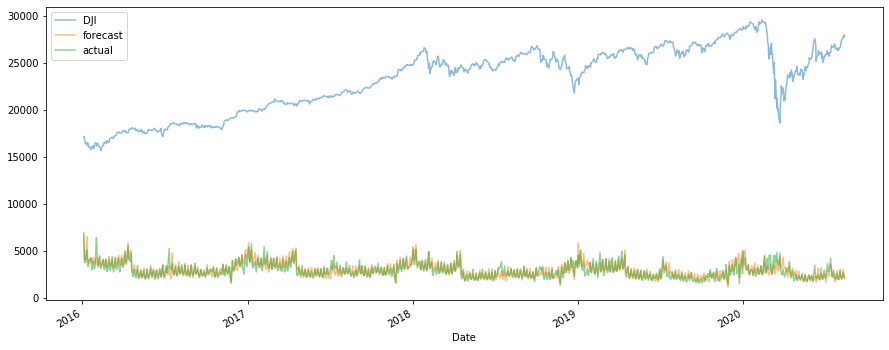

In [259]:
_ = df.plot(figsize = (15,6), alpha=.5)

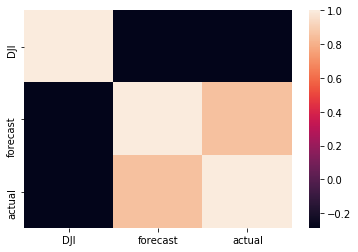

In [260]:
import seaborn as sns

_ = sns.heatmap(df.corr())

There is a weak negative correlation between DJI and actual and forecast volume (when dji goes down, volume tends to increase), while there is a strong positive correlation between actual and forecast volume (when actual volume increases, forecast volume tends to increase per the forecasting model)

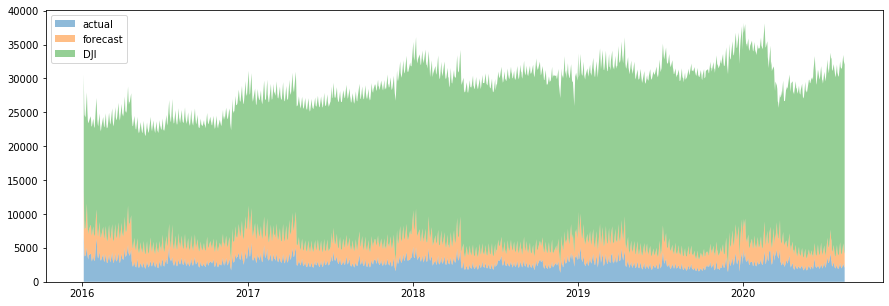

In [261]:
plt.figure(figsize=(15,5))
plt.stackplot(df.index, df['actual'], df['forecast'], df['DJI'], baseline='zero',
              labels= ['actual', 'forecast','DJI'], alpha=.5)
plt.legend(loc='upper left')
plt.show()

In [262]:
pc = df.pct_change()

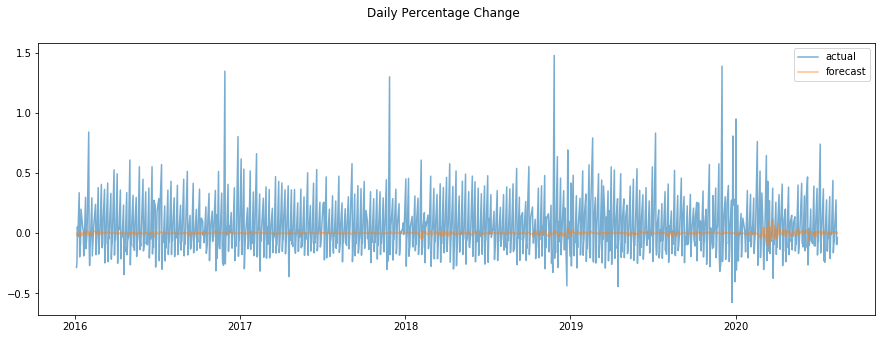

In [263]:
plt.figure(figsize=(15,5))
plt.plot(pc['actual'], alpha=.6)
plt.plot(pc['DJI'], alpha=.5)
# plt.plot(pc['forecast'], alpha=.6)
plt.legend(['actual', 'forecast'])
plt.suptitle('Daily Percentage Change')
plt.show()

In [264]:
df['diff'] = df['actual'] - df['forecast']

In [265]:
df['diff'].describe()

count    1160.000000
mean      -67.791379
std       399.323906
min     -1399.000000
25%      -296.250000
50%       -96.000000
75%       137.250000
max      2094.000000
Name: diff, dtype: float64

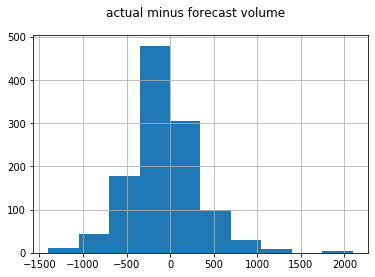

In [266]:
_ = df['diff'].hist()
plt.suptitle('actual minus forecast volume')
plt.show()

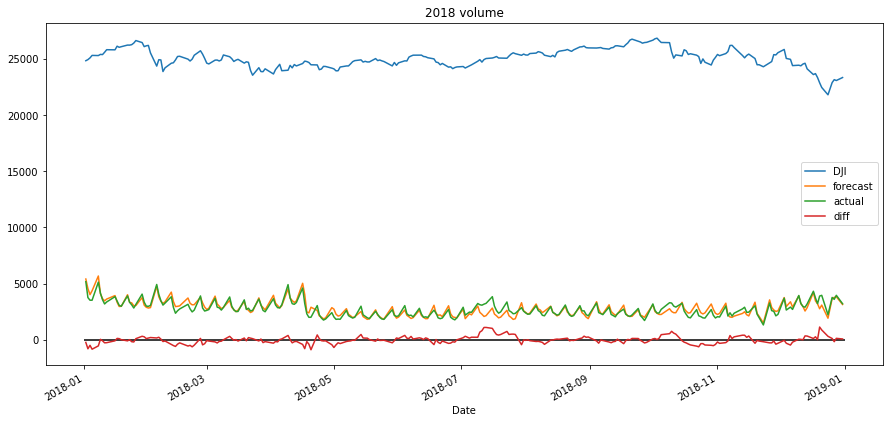

In [267]:
df[(df.index<'2019') & (df.index > '2018')].plot(figsize= (15,7))
plt.hlines(xmin='2018', xmax='2019', y=0)
plt.title('2018 volume')
plt.show()

Text(0.5, 1.0, '2016 Q1 volume')

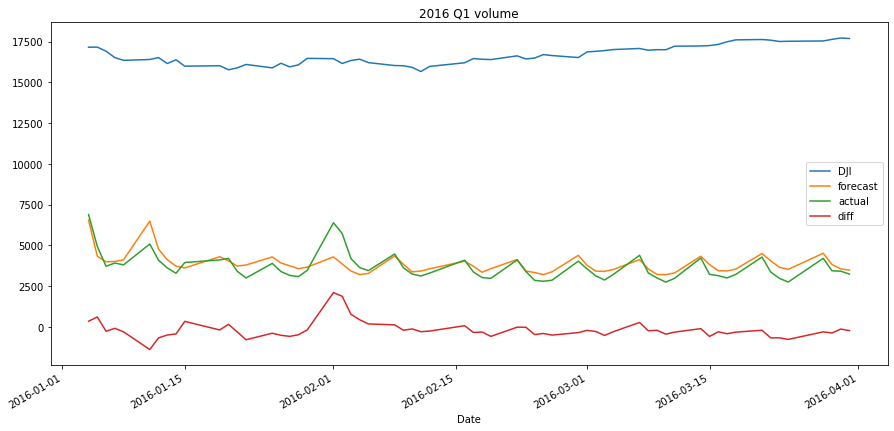

In [268]:
df[(df.index.quarter==1) & (df.index.year==2016)].plot(figsize= (15,7))
plt.title('2016 Q1 volume')

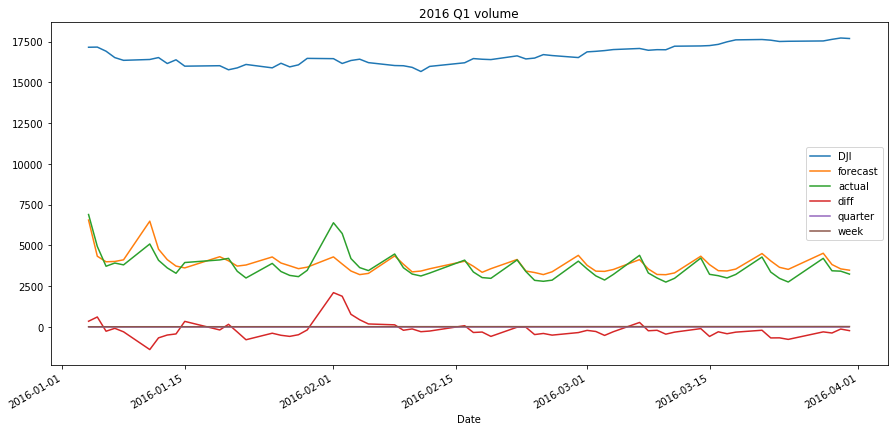

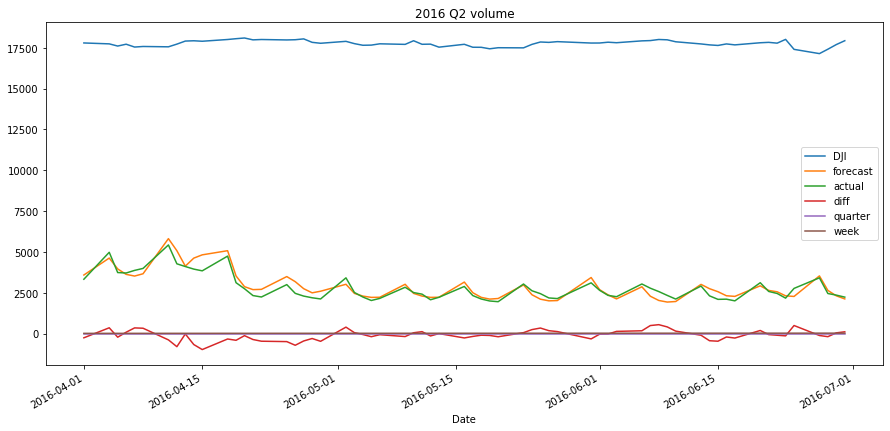

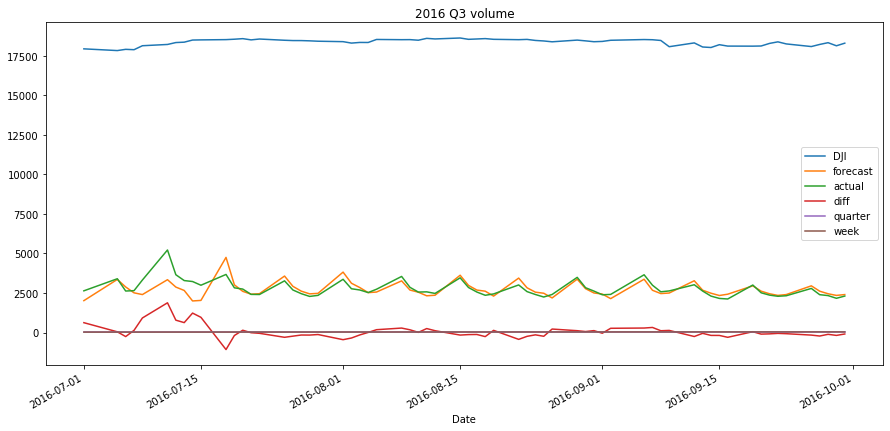

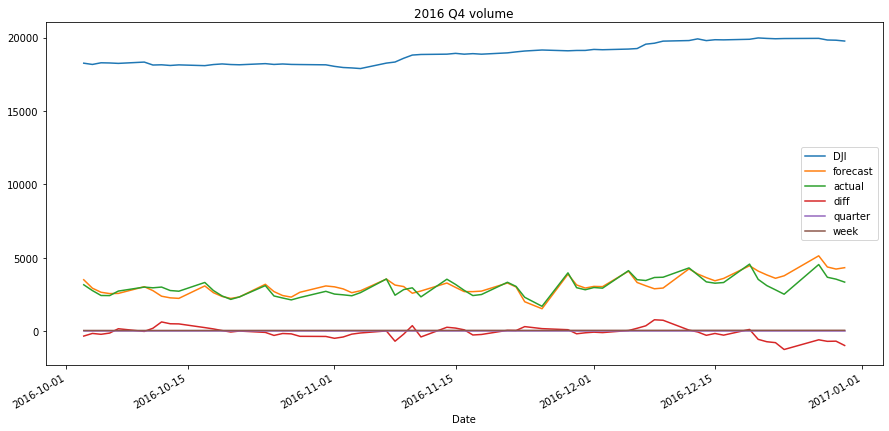

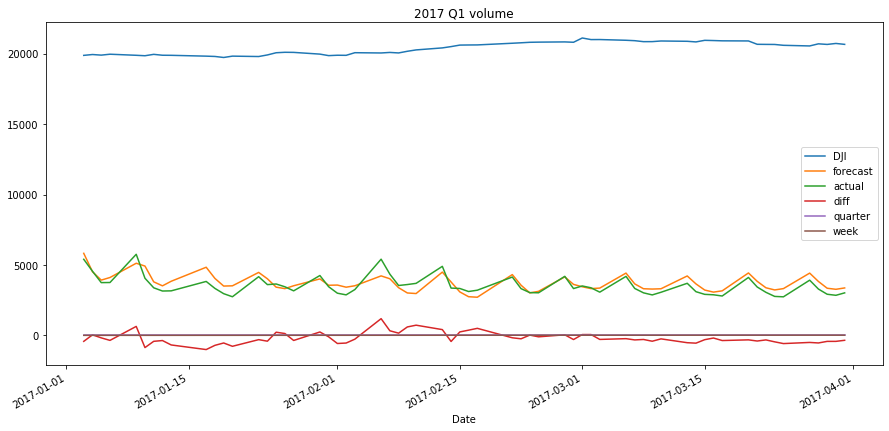

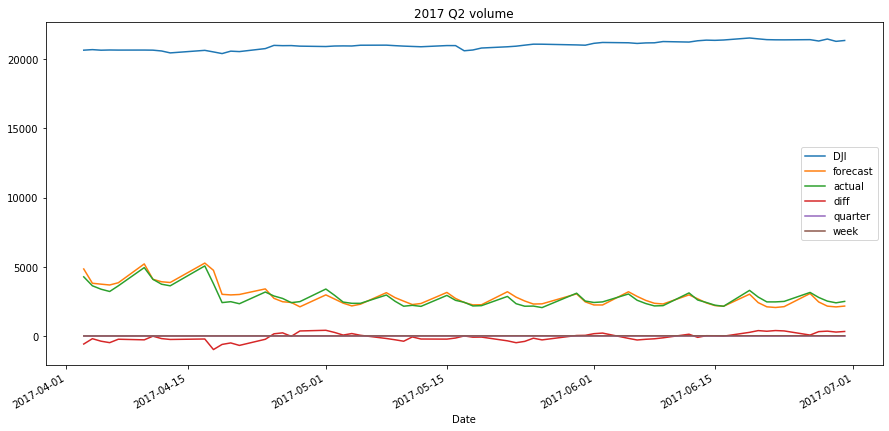

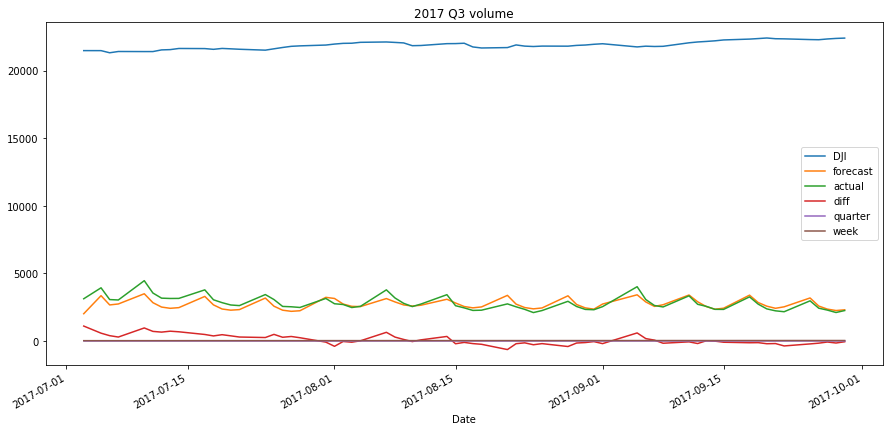

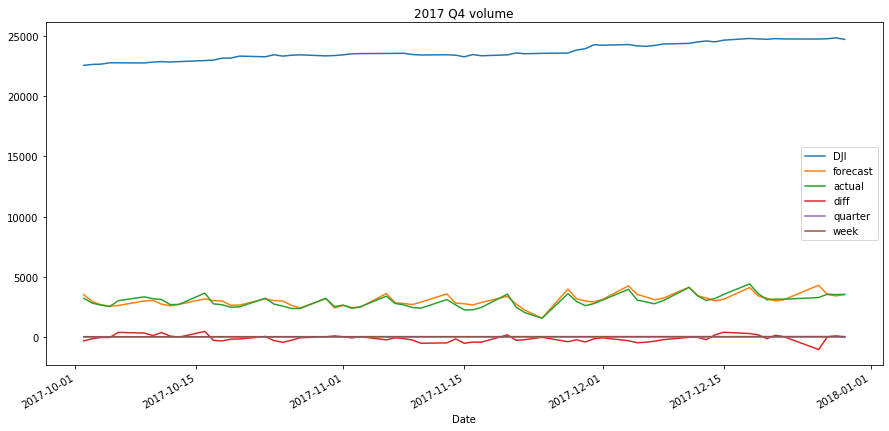

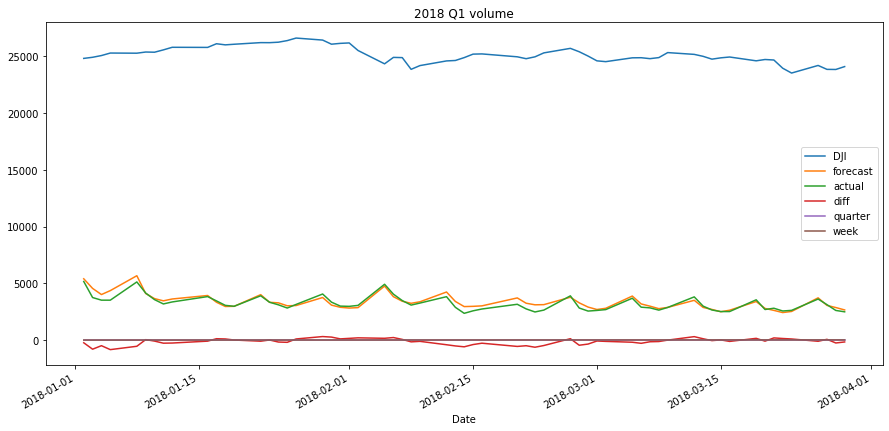

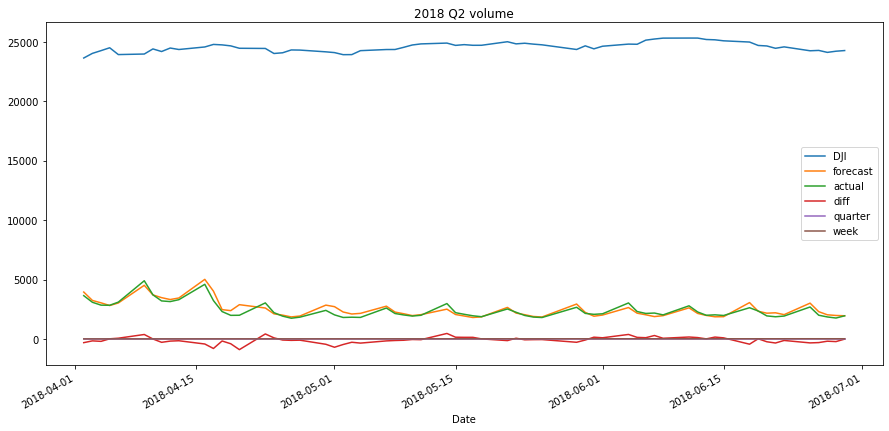

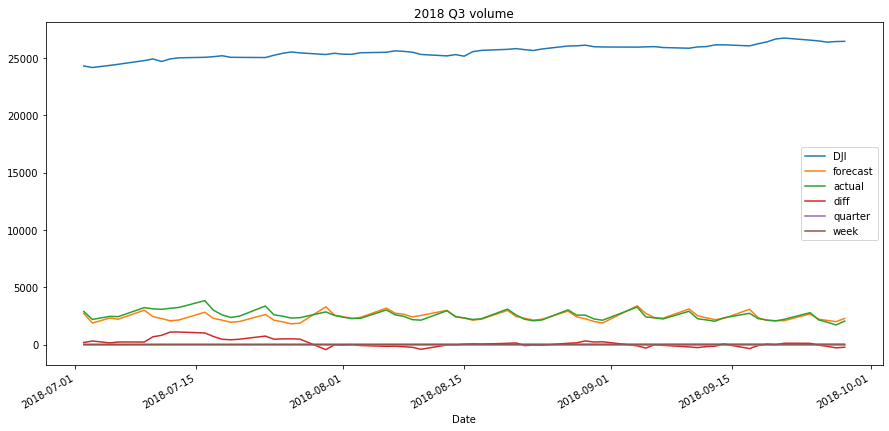

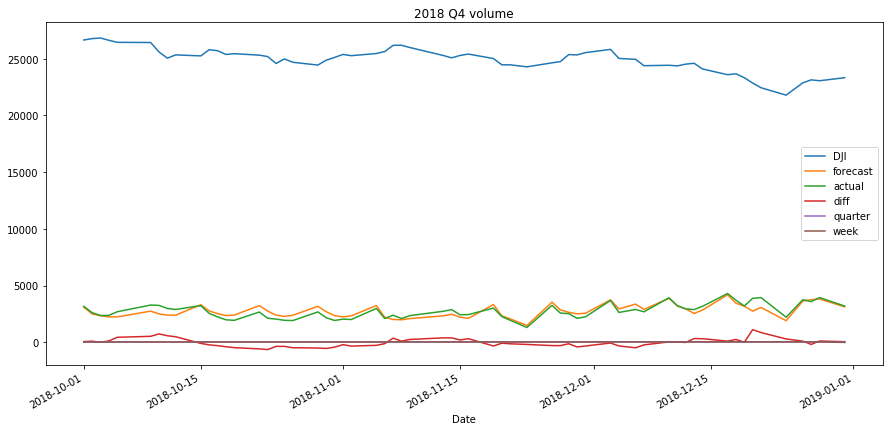

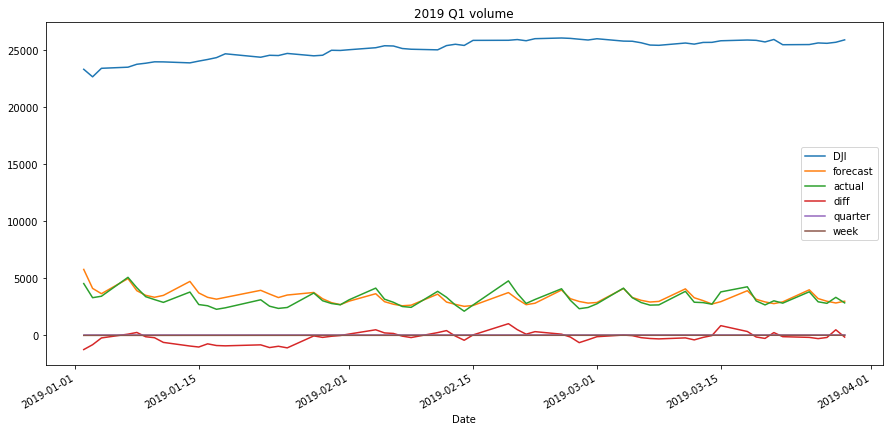

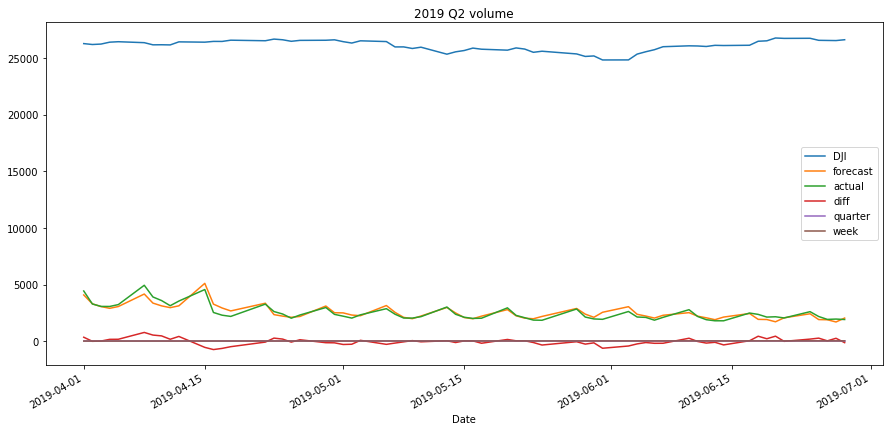

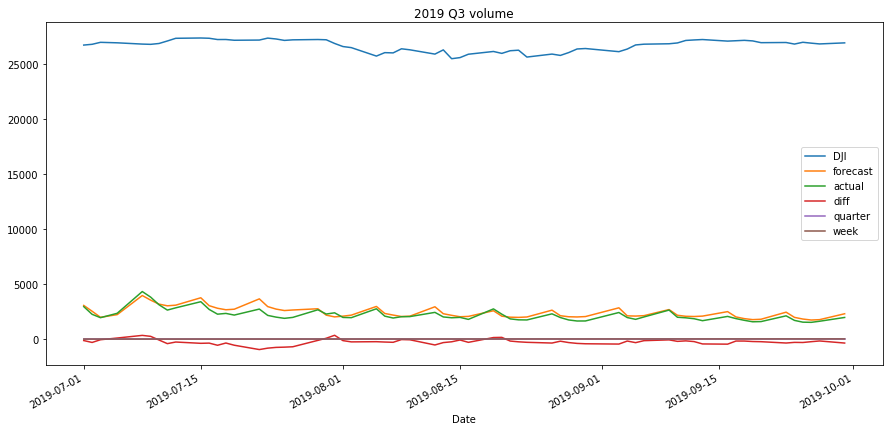

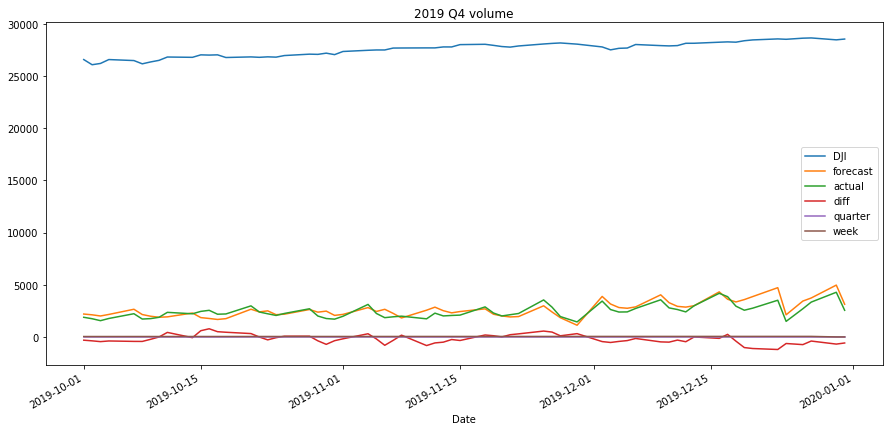

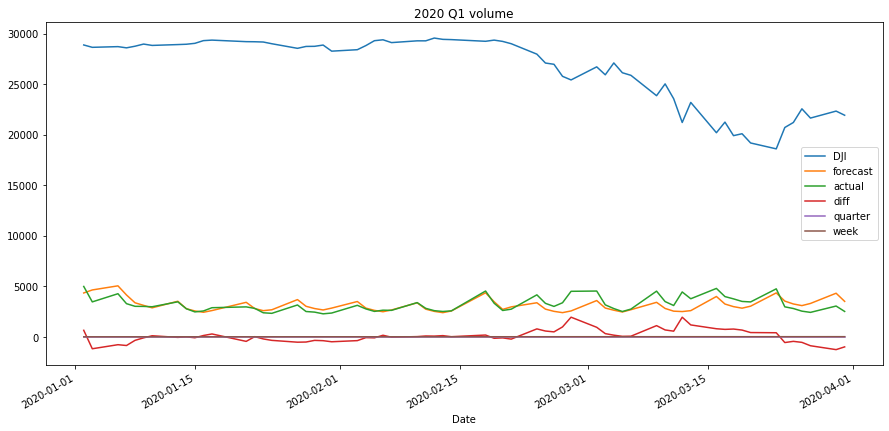

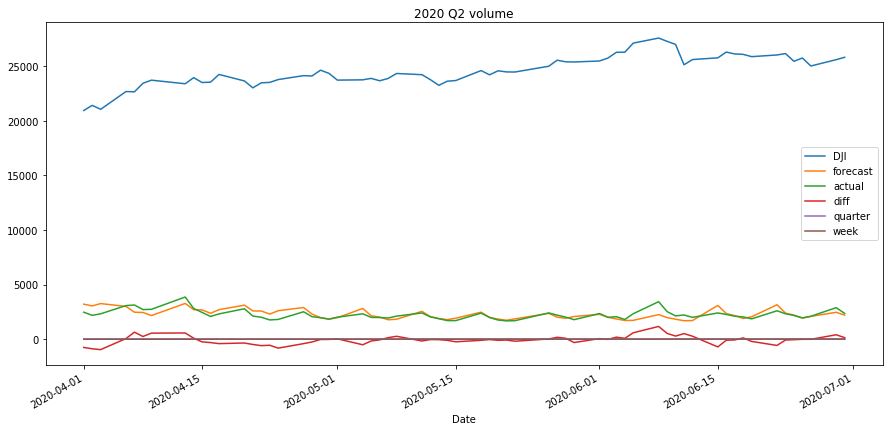

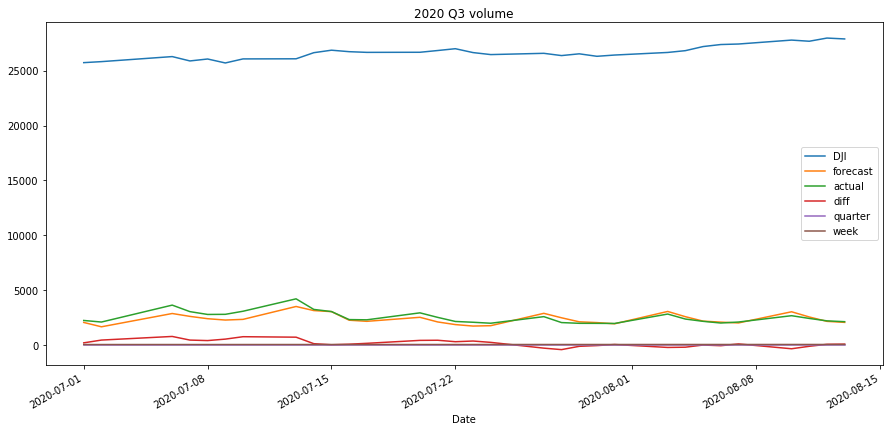

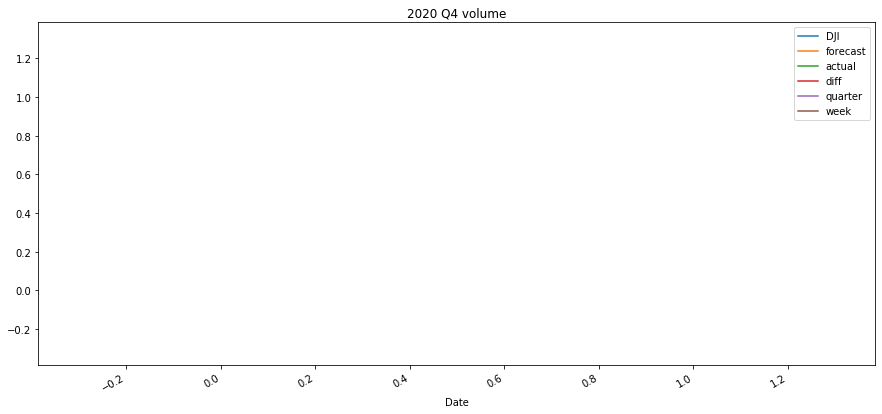

In [279]:
for y in range(2016,2021):
    for q in range(1,5):
        df[(df.index.quarter==q) & (df.index.year==y)].plot(figsize= (15,7))
        plt.title(str(y)+' Q'+str(q)+' volume')
plt.show()

In [273]:
df.groupby('quarter')['actual'].describe()

,count,mean,std,min,25%,50%,75%,max
quarter,,,,,,,,
1,307.0,3341.426710,728.926149,2123.0,2824.0,3161.0,3717.0,6886.0
2,317.0,2552.596215,686.688058,1692.0,2077.0,2349.0,2852.0,5426.0
3,285.0,2561.431579,549.368767,1545.0,2186.0,2460.0,2847.0,5222.0
4,251.0,2775.533865,641.198186,1317.0,2313.0,2708.0,3207.5,4562.0


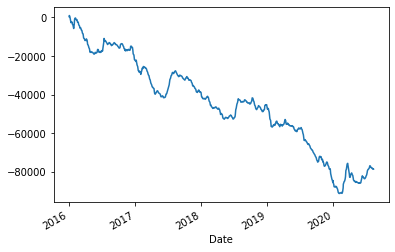

In [270]:
df['diff'].cumsum().plot()

In [272]:
df['quarter'] = df.index.quarter

Text(0.5, 1.0, 'actual volumes by week')

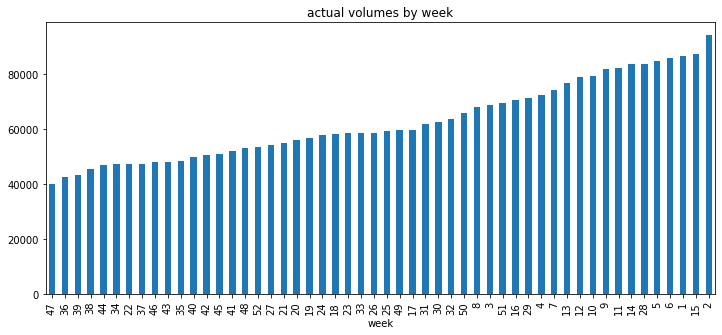

In [274]:
df['week'] = df.index.week
df.groupby('week')['actual'].sum().sort_values().plot.bar(figsize=(12,5))

plt.title('actual volumes by week')

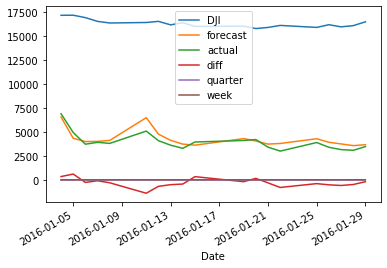

In [275]:
df[(df.index.month==1) & (df.index.month==1) & (df.index.year==2016)].plot()